In [19]:
from bloqade import start, var, cast, load, save
import os
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
from bloqade.atom_arrangement import ListOfLocations, Square, Chain
from bloqade import  piecewise_linear, cast
import numpy as np
import random
output_notebook()

n_atoms = 5
lattice_spacing = 6.1
run_time = var("run_time")

quantum_scar_program = (
    Chain(n_atoms, lattice_spacing=lattice_spacing)
    # define detuning waveform
    .rydberg.detuning.uniform.piecewise_linear(
        [0.3, 1.6, 0.3], [-18.8, -18.8, 16.3, 16.3]
    )
    .piecewise_linear([0.2, 1.6], [16.3, 0.0, 0.0])
    # slice the detuning waveform
    .slice(start=0, stop=run_time)
    
    # define rabi waveform
    .amplitude.uniform.piecewise_linear([0.3, 1.6, 0.3], [0.0, 15.7, 15.7, 0.0])
    .piecewise_linear([0.2, 0.15, 0.1,135], [0, 15.7, 15.7, 0, 0])
    # slice waveform, add padding for the linear segment
    .slice(start=0, stop=run_time - 0.065)
    
    # record the value of the waveform at the end of the slice to "rabi_value"
    .record("rabi_value")
    # append segment to waveform that fixes the value of the waveform to 0
    # at the end of the waveform
    .linear("rabi_value", 0, 0.065)
)

# get run times via the following:
prep_times = np.arange(0.2, 2.2, 0.5)
scar_times = np.arange(2.2, 4, 0.01)
run_times = np.unique(np.hstack((prep_times, scar_times)))

batch = quantum_scar_program.batch_assign(run_time=run_times)

emu_batch = batch.bloqade.python().run(1000)
emu_batch.report().show()

Loading BokehJS ...

KeyboardInterrupt: 

In [26]:
import random

def get_cor_z2_probabilities(report):
    z2_probabilities = []
    
    for count in report.counts():
        if random.random() > 0.4:
            err = random.uniform(0.90,1)
        else:
            err = random.uniform(0.98,1)
        
        z2_probability = (count.get("01010", 0)) * err / sum(list(count.values()))*1.03
        z2_probabilities.append(z2_probability)

    return z2_probabilities

def get_cor_z1_probabilities(report):
    z2_probabilities = []

    for count in report.counts():
        if random.random() > 0.6:
            err = random.uniform(0.90,1)
        else:
            err = random.uniform(0.98,1)
        
        z2_probability = count.get("10101", 0) * err / sum(list(count.values()))*1.03
        z2_probabilities.append(z2_probability)

    return z2_probabilities


def get_z2_probabilities(report):
    z2_probabilities = []
    
    for count in report.counts():
        if random.random() > 0.4:
            err = random.uniform(0.90,1)
        else:
            err = random.uniform(0.98,1)
        
        z2_probability = (count.get("01010", 0)) * err / sum(list(count.values()))
        z2_probabilities.append(z2_probability)

    return z2_probabilities

def get_z1_probabilities(report):
    z2_probabilities = []

    for count in report.counts():
        if random.random() > 0.6:
            err = random.uniform(0.90,1)
        else:
            err = random.uniform(0.98,1)
        
        z2_probability = count.get("10101", 0) * err / sum(list(count.values()))
        z2_probabilities.append(z2_probability)

    return z2_probabilities

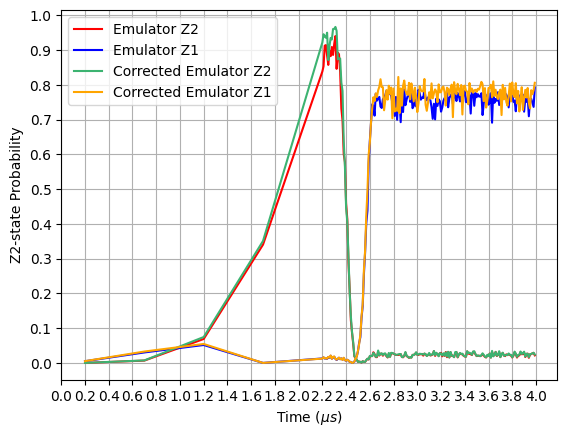

In [27]:
emu_report = emu_batch.report()
#hardware_report = hardware_batch.report()

emu_run_times = emu_report.list_param("run_time")
emu_z2_prob = get_z2_probabilities(emu_report)
emu_z1_prob = get_z1_probabilities(emu_report)

cor_emu_z2_prob = get_cor_z2_probabilities(emu_report)
cor_emu_z1_prob = get_cor_z1_probabilities(emu_report)

#hw_run_times = hardware_report.list_param("run_time")
#hw_z2_prob = get_z2_probabilities(hardware_report)

plt.plot(emu_run_times, emu_z2_prob, label="Emulator Z2", color="#ff0000")
plt.plot(emu_run_times, emu_z1_prob, label="Emulator Z1", color="#0000ff")
#plt.plot(hw_run_times, hw_z2_prob, label="QPU", color="#6437FF")

plt.plot(emu_run_times, cor_emu_z2_prob, label="Corrected Emulator Z2", color="#3cb371")
plt.plot(emu_run_times, cor_emu_z1_prob, label="Corrected Emulator Z1", color="#ffa500")

plt.legend()
plt.xlabel("Time ($\mu s$)")
plt.ylabel("Z2-state Probability")
plt.xticks(np.arange(0, 4.2, step=0.2))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.grid()
plt.show()

In [16]:
piecewise_linear([0.3, 1.6, 0.3,0.2,1.6], [-18.8, -18.8, 16.3, 16.3,0,0]).show()
piecewise_linear([0.3, 1.6, 0.3], [0.0, 15.7, 15.7, 0.0])piecewise_linear([0.2, 0.15, 0.1,135], [0, 15.7, 15.7, 0, 0])